# Library imports

In [1]:
import tensorflow
import numpy
from matplotlib import pyplot
import cv2
import os
import random
import pickle
import keras
from sklearn.metrics import confusion_matrix,classification_report
import seaborn
# %matplotlib qt
%matplotlib inline

# Data imports

In [47]:
classes_list=['Melanoma', 'Normal']
def printClassList():
    for class_name in classes_list:
        print(f"{classes_list.index(class_name)} -->  {class_name}")
printClassList()   
def getClassvalue(index):
    print(classes_list[index])

0 -->  Melanoma
1 -->  Normal


In [49]:
loaded_pickle_features=open("../Data/Object_Data/pickle_fetures.pickle","rb")
Training_Features=pickle.load(loaded_pickle_features)
loaded_pickle_features.close()
loaded_pickle_labels=open("../Data/Object_Data/pickle_labels.pickle","rb")
Training_Labels=pickle.load(loaded_pickle_labels)
loaded_pickle_labels.close()

In [50]:
loaded_pickle_testing_features=open("../Data/Object_Data/pickle_testing_fetures.pickle","rb")
Testing_Features=pickle.load(loaded_pickle_testing_features)
loaded_pickle_testing_features.close()
loaded_pickle_testing_labels=open("../Data/Object_Data/pickle_testing_labels.pickle","rb")
Testing_Labels=pickle.load(loaded_pickle_testing_labels)
loaded_pickle_testing_labels.close()

In [51]:
Training_Features.shape

(186, 180, 180)

In [52]:
Testing_Features.shape

(55, 180, 180)

In [53]:
len(Training_Labels)

186

In [54]:
len(Testing_Labels)

55

In [55]:
Training_Features[0].shape

(180, 180)

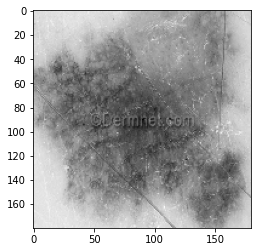

In [56]:
pyplot.imshow(Training_Features[2],cmap='gray')

In [57]:
printClassList()

0 -->  Melanoma
1 -->  Normal


## Dimention expansion

In [58]:
Training_Features=numpy.expand_dims(Training_Features,axis=-1)
Testing_Features=numpy.expand_dims(Testing_Features,axis=-1)
# Validation_Features=numpy.expand_dims(Validation_Features,axis=-1)

In [59]:
Training_Features.shape

(186, 180, 180, 1)

In [60]:
Testing_Features.shape

(55, 180, 180, 1)

In [61]:
# Validation_Features.shape

In [62]:
len(Training_Labels)

186

In [63]:
len(Testing_Labels)

55

## Model Definition

In [64]:
model1_using_only_one_layers=keras.models.Sequential(
     [
         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[180,180,1]),
         keras.layers.MaxPool2D(pool_size=(2,2)),
         keras.layers.Flatten(),
         keras.layers.Dense(units=512,activation='relu'),
         keras.layers.Dense(units=128,activation='relu'),
         keras.layers.Dense(units=2,activation='softmax'),
     ]
 )

In [65]:
model1_using_only_one_layers

In [66]:
model1_using_only_one_layers.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 178, 178, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 253472)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               129778176 
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 258       
Total params: 129,844,418
Trainable params: 129,844,418
Non-trainable params: 0
________________________________________

In [67]:
model1_using_only_one_layers.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [68]:
history1=model1_using_only_one_layers.fit(Training_Features,numpy.array(Training_Labels),epochs=5,verbose=1,validation_data=(Testing_Features,numpy.array(Testing_Labels)))

Epoch 1/5
6/6 [==============================] - 13s 2s/step - loss: 9.2569 - accuracy: 0.5430 - val_loss: 0.7810 - val_accuracy: 0.4545
Epoch 2/5
6/6 [==============================] - 9s 1s/step - loss: 0.6290 - accuracy: 0.7419 - val_loss: 0.2258 - val_accuracy: 0.9455
Epoch 3/5
6/6 [==============================] - 8s 1s/step - loss: 0.4371 - accuracy: 0.7903 - val_loss: 0.1438 - val_accuracy: 0.9818
Epoch 4/5
6/6 [==============================] - 8s 1s/step - loss: 0.2566 - accuracy: 0.8656 - val_loss: 0.1949 - val_accuracy: 0.9091
Epoch 5/5
6/6 [==============================] - 9s 1s/step - loss: 0.1699 - accuracy: 0.9301 - val_loss: 0.0946 - val_accuracy: 0.9636


In [92]:
model1_using_only_one_layers.save('./Models/model_using_only_one_layers.h5')

In [70]:
# trained_model=tensorflow.keras.models.load_model('./Models/model_using_only_one_layers.h5')
trained_model=model1_using_only_one_layers

In [71]:
prediction=trained_model.predict(numpy.expand_dims(Testing_Features[0],axis=0)).round(5)*100

In [72]:
list(prediction[0])

[99.375, 0.625]

In [73]:
# numpy.sum(prediction[0])

In [74]:
predicted_classes=list(prediction[0])
sorted_indexes={}
temp_array=[i for i in predicted_classes]
for i in predicted_classes:
    index_value=list(temp_array).index(max(temp_array))
    sorted_indexes.update({index_value:max(temp_array)})
    temp_array[index_value]=-1
# print(temp_array)
print(sorted_indexes.keys())
    

dict_keys([0, 1])


In [75]:
max(prediction[0])

99.375

In [76]:
class_value=list(prediction[0]).index(max(prediction[0]))

In [77]:
class_value

0

In [78]:
for key,value in sorted_indexes.items():
    print(f"{value} % --> ",end="")
    getClassvalue(key)

99.375 % --> Melanoma
0.625 % --> Normal


In [79]:
print("Actual class is --> ",end="")
getClassvalue(Testing_Labels[0])

Actual class is --> Melanoma


In [81]:
Predeicted_test_data=trained_model.predict(Testing_Features)

In [84]:
predicted_values=[numpy.argmax(result) for result in Predeicted_test_data]

In [85]:
for i in range(len(predicted_values)):
    print(predicted_values[i]," - > ",Testing_Labels[i])

0  - >  0
1  - >  1
1  - >  1
0  - >  0
1  - >  1
0  - >  0
0  - >  0
0  - >  0
1  - >  1
1  - >  1
0  - >  0
0  - >  0
1  - >  1
0  - >  0
1  - >  1
0  - >  0
1  - >  1
1  - >  1
1  - >  1
1  - >  1
1  - >  1
0  - >  0
1  - >  1
1  - >  1
0  - >  0
0  - >  0
1  - >  1
1  - >  1
1  - >  1
0  - >  0
1  - >  1
0  - >  0
0  - >  1
0  - >  0
1  - >  1
0  - >  0
1  - >  1
0  - >  0
0  - >  0
1  - >  1
0  - >  0
1  - >  1
0  - >  0
0  - >  0
0  - >  0
0  - >  0
0  - >  0
0  - >  0
0  - >  0
0  - >  0
0  - >  0
0  - >  0
1  - >  1
0  - >  1
0  - >  0


In [86]:
confusion_matrix_data=confusion_matrix(predicted_values,Testing_Labels)

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

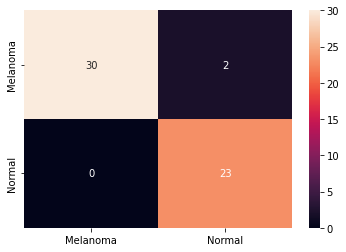

In [88]:
seaborn.heatmap(confusion_matrix_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
# seaborn.heatmap(confusion_matrix_data,annot=True)

In [90]:
classification_report_data=classification_report(predicted_values,Testing_Labels,target_names=classes_list)

In [91]:
print(classification_report_data)

              precision    recall  f1-score   support

    Melanoma       1.00      0.94      0.97        32
      Normal       0.92      1.00      0.96        23

    accuracy                           0.96        55
   macro avg       0.96      0.97      0.96        55
weighted avg       0.97      0.96      0.96        55

